In [3]:
import scipy.misc
import numpy as np
from PIL  import Image

In [6]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale



In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [8]:
np.random.seed(42)

In [9]:
# 71 characters
nb_classes = 71
# input image dimensions
img_rows, img_cols = 32, 32

ary = np.load("hiragana.npz")['arr_0'].reshape([-1, 127, 128]).astype(np.float32) / 15
X_train = np.zeros([nb_classes * 160, img_rows, img_cols], dtype=np.float32)
for i in range(nb_classes * 160):
    X_train[i] = scipy.misc.imresize(ary[i], (img_rows, img_cols), mode='F')

/home/hexagramg/hiraclust/venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if __name__ == '__main__':


In [9]:
len(ary)


11360

In [10]:
ary = np.load("hiragana.npz") 

In [11]:
ary['arr_0'].shape

(71, 160, 127, 128)

In [12]:
data = ary['arr_0']

In [18]:
data[0,0,:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

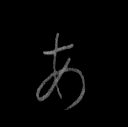

In [13]:
Image.fromarray(data[0,0,:])


In [315]:
firstLetter = data[1,:]

In [15]:
firstLetter.shape

(160, 127, 128)

In [316]:
flattenFl = firstLetter.flatten()

In [26]:
def biColor(X):
    if X>0:
        return 255
    else:
        return 0

In [317]:
toWhite = np.vectorize(biColor)

In [318]:
newFlat = toWhite(flattenFl)

In [319]:
WhiteFL = newFlat.reshape(160,127,128).astype(np.uint8)

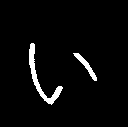

In [320]:
Image.fromarray(WhiteFL[0,:])

In [321]:
firstLetter_ = WhiteFL.reshape(160,16256)

In [189]:
firstLetter_ = firstLetter.reshape(160,16256).astype(np.float)

In [281]:
n_samples, n_features = firstLetter_.shape
n_digits = 40

In [33]:
est = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)

est_ = KMeans(init='random', n_clusters=n_digits, n_init=10)


In [34]:
esst = est.fit(firstLetter_)

In [35]:
pred = esst.predict(firstLetter_)

In [48]:
pred

array([1, 5, 4, 2, 4, 3, 6, 2, 5, 6, 9, 5, 5, 5, 2, 0, 8, 1, 5, 8, 0, 9,
       2, 8, 3, 2, 1, 0, 4, 0, 0, 8, 9, 0, 8, 0, 3, 4, 0, 2, 4, 9, 3, 6,
       7, 3, 2, 0, 3, 2, 4, 6, 4, 2, 6, 3, 0, 2, 6, 3, 1, 8, 9, 3, 2, 1,
       6, 1, 5, 9, 1, 6, 5, 3, 9, 5, 4, 0, 9, 4, 9, 1, 5, 1, 2, 1, 2, 3,
       6, 2, 2, 3, 3, 7, 3, 7, 4, 1, 0, 9, 1, 7, 2, 1, 8, 4, 7, 1, 2, 3,
       2, 1, 7, 2, 2, 3, 0, 3, 1, 9, 8, 7, 2, 3, 1, 2, 6, 1, 9, 0, 8, 7,
       0, 5, 3, 4, 1, 8, 0, 0, 7, 2, 5, 5, 6, 0, 8, 6, 5, 2, 6, 5, 9, 8,
       9, 1, 4, 4, 7, 2], dtype=int32)

In [342]:
inic = [i for i,v in enumerate(pred) if v ==4]

In [343]:
len(inic)

15

In [186]:
new_img = Image.new('L', (128*7, 128*7))

In [169]:
def avImage(arr, indic):
    average = np.zeros((127,128)).astype(np.uint)
    for i in indic:
        average = np.add(arr[i],average)
    average = (average.flatten()/len(inic)).reshape(127,128)
    print(average)
    return average

In [170]:
for i,v in enumerate(inic):
    iimg = Image.fromarray(WhiteFL[v,:])
    new_img.paste(iimg, (128*(i%7), 128*(i//7)))
    if (i+1) == len(inic):
        iimg = Image.fromarray(avImage(WhiteFL,inic).astype(np.uint8))
        new_img.paste(iimg, (128*((i+1)%7), 128*((i+1)//7)))


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [344]:
imgss = [WhiteFL[i] for i in inic]
new_img = np.average(imgss, axis = 0)

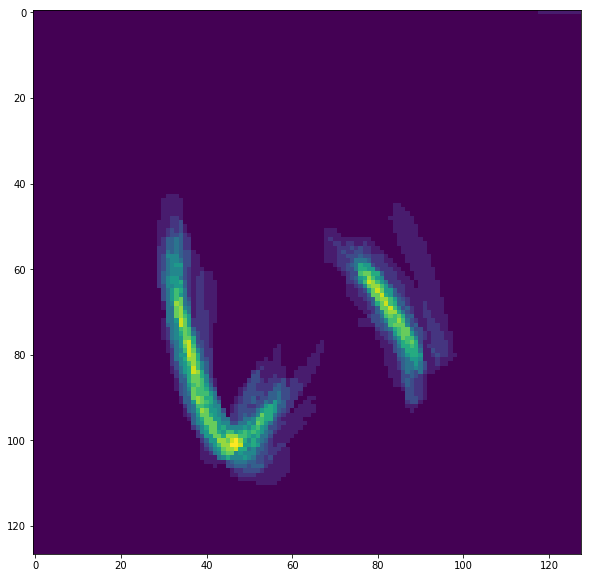

In [345]:
plt.imshow(new_img)

In [322]:
# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit_transform(firstLetter_)
pcak = KMeans(init='k-means++', n_clusters=(n_digits//4), n_init=5)

print(82 * '_')



__________________________________________________________________________________


In [323]:
pcak.fit(pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [324]:
pred = pcak.predict(pca)

In [260]:
# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=6).fit_transform(firstLetter_)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

MemoryError: 